## HW03 Notebook

Complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code). Submit the following:
1. This notebook file and `hw3.py`, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.

__NOTE__: The purpose of this notebook is to demonstrate the functionality implemented in `hw3.py`. As part of this demo, all analysis (i.e., questions that prompt for a short answer) are to be added to the notebook. Keep the order of the problems as listed in the assignment description. Furthermore, cells are provided as placeholders for each response; however, cells can be added as needed.

Please report any questions to the [class Piazza page](https://piazza.com/class/lcwv1h9p2a11ai).

### Import required libraries.

In [1]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
from hw3 import calc_confusion_matrix_for_threshold
from hw3 import calc_percent_cancer
from hw3 import calc_binary_metrics
from hw3 import predict_0_always_classifier
from hw3 import calc_accuracy
from hw3 import print_perf_metrics_for_threshold
from hw3 import calc_perf_metrics_for_threshold

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

#### 1) Function to calculate TP, TN, FP, and FN.
The following four calls to the function `calc_binary_metrics` to test it. This way, the function can be tested for several edge cases. ***Don't modify this.***

In [2]:
all0 = np.zeros(10)
all1 = np.ones(10)
TP, TN, FP, FN = calc_binary_metrics(all0, all1)
print(f"0 vs 1\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

0 vs 1
TP: 0
TN: 0
FP: 10
FN: 0


In [3]:
TP, TN, FP, FN = calc_binary_metrics(all1, all0)
print(f"1 vs 0\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

1 vs 0
TP: 0
TN: 0
FP: 0
FN: 10


In [4]:
TP, TN, FP, FN = calc_binary_metrics(all1, all1)
print(f"1 vs 1\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

1 vs 1
TP: 10
TN: 0
FP: 0
FN: 0


In [5]:
TP, TN, FP, FN = calc_binary_metrics(all0, all0)
print(f"0 vs 0\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

0 vs 0
TP: 0
TN: 10
FP: 0
FN: 0


### Load the dataset.

The following should ***not*** be modified.

After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [6]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data/y_test.csv', delimiter=',', skiprows=1)

Inspect Data. The following should ***not*** be modified.

In [7]:
feat_names = np.loadtxt(f'data/x_train.csv', delimiter=',', dtype=str, max_rows=1)
print(f"features: {feat_names}\n")
target_name = np.loadtxt(f'data/x_test.csv', delimiter=',', dtype=str, max_rows=1)
df_sampled_data = pd.DataFrame(x_test, columns=feat_names)
df_sampled_data[str(target_name)] = y_test
df_sampled_data.sample(15)

features: ['age' 'famhistory' 'marker']



,age,famhistory,marker,['age' 'famhistory' 'marker']
132,73.92351,1.0,0.733247,0.0
2,60.92310,0.0,1.470153,0.0
24,64.54343,0.0,0.089446,0.0
153,68.03571,1.0,0.675789,0.0
84,60.61431,1.0,0.603407,0.0
107,62.48188,1.0,0.237959,0.0
166,63.50109,0.0,0.294197,0.0
127,55.60165,0.0,1.263440,0.0
8,59.21431,0.0,0.154820,0.0
172,66.20989,1.0,0.812278,0.0


### 2) Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [8]:
tr_percent = calc_percent_cancer(y_train)
te_percent = calc_percent_cancer(y_test)

print("Percent of data that has_cancer on TRAIN: %.3f" % tr_percent)
print("Percent of data that has_cancer on TEST : %.3f" % te_percent)

Percent of data that has_cancer on TRAIN: 14.035
Percent of data that has_cancer on TEST : 13.889


### 3) The predict-0-always baseline

#### (i) Compute the accuracy of the always-0 classifier.

Complete the functions to compute and calculate the accuracy of the always-0 classifier on validation and test outputs.

In [9]:
y_train_pred = predict_0_always_classifier(x_train)
y_test_pred = predict_0_always_classifier(x_test)

acc_train = calc_accuracy(*calc_binary_metrics(y_train, y_train_pred))
acc_test = calc_accuracy(*calc_binary_metrics(y_test, y_test_pred))
print("acc on TRAIN: %.3f" % acc_train)
print("acc on TEST : %.3f" % acc_test)

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (ii) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [10]:
print(calc_confusion_matrix_for_threshold(y_test, y_test_pred, 0.5))

Predicted    0  1
True             
0          155  0
1           25  0


#### (iii) Reflect on the accuracy of the always-0 classifier.

**Answer**: The accuracy of the always-0 classifier is $\frac{155}{155+25} \approx 86\%$. However, this simply reflects the nature of the test set, in that it contains a majority of data with negative labels, or patients without cancer. The classifier can also never actually predict a positive label, which suggests that it can never diagnose a patient with cancer.

#### (iv) Analyze the various costs of using the always-0 classifier.

**Answer**: In this case, although the always-0 classifier correctly identifies all patients without cancer as such, it fails to identify any patients with cancer. This means that the classifier is not useful for identifying patients with cancer, and thus, as the purpose of the classifier is to identify patients with cancer, it does not meet its goal. Given that missing a cancer diagnosis may lead to the death of a patient, the the cost of the classifier's errors is high. In fact, this classifier suggests that cancer will *never* be detected in patients.

### 4: Basic Perceptron Models

#### (i) Normalize data

In [11]:
from hw3 import standardize_data

x_train_std, x_test_std = standardize_data(x_train, x_test)

#### (ii) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [12]:
from hw3 import perceptron_classifier, accuracy_score

pred_train, pred_test = perceptron_classifier(x_train_std, y_train, x_test_std, y_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

print("Accuracy on training data: {:.2f}".format(acc_train))
print("Accuracy on test data: {:.2f}".format(acc_test))

print("Confusion matrix on test data:\n{}".format(calc_confusion_matrix_for_threshold(y_test, pred_test)))

Accuracy on training data: 0.25
Accuracy on test data: 0.27
Confusion matrix on test data:
Predicted   0    1
True              
0          24  131
1           0   25


#### (iii) Compare the `Perceptron` to the always-0 classifier.

**Answer**:  While the perceptron classifier has a lower accuracy than the always-0 classifier, it no longer misses any patients with cancer, which means that it can correctly identify patients who have cancer. However, the classifier also incorrectly identifies 131 patients without cancer as having cancer, which is a high enough error rate to effect certain negative costs on the system, as it would have to perform additional tests on these patients, since only about 16% of all patients identified as having cancer actually have cancer.

#### (iv) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [13]:
from hw3 import series_of_preceptrons

alphas = np.logspace(-5, 5, base=10, num=100)
train_accuracy_list, test_accuracy_list = series_of_preceptrons(x_train_std, y_train, x_test_std, y_test, alphas)

##### Plot accuracy on train/test data across the different alpha values plotted on a logarithmic scale. Make sure to show title, legends, and axis labels.

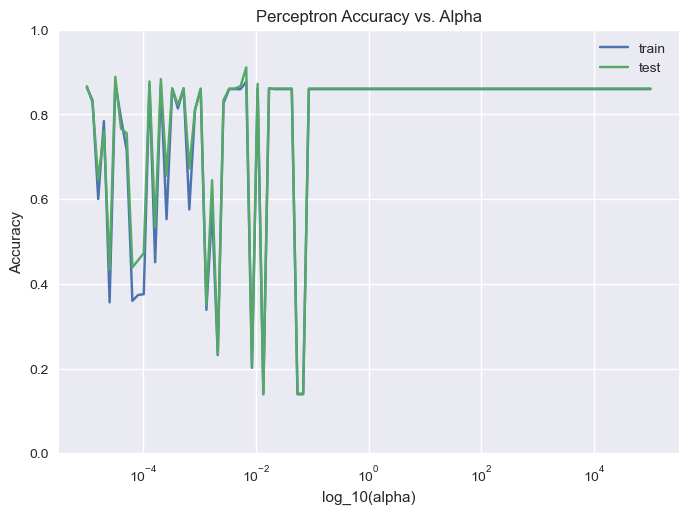

In [14]:
plt.xlabel('log_10(alpha)');
plt.ylabel('Accuracy');
plt.plot(alphas, train_accuracy_list, label='train');
plt.plot(alphas, test_accuracy_list, label='test');

plt.legend();
plt.title('Perceptron Accuracy vs. Alpha');
plt.xscale('log');
plt.ylim(0.0, 1.0);

#### (iv) Discuss what the plot is showing you.

**Answer**: The plot shows that for lower values of `alpha`, especially below roughly $10^{-1}$, the accuracy of the perceptron model varies significantly, with many dips in accuracy down to about 15%. However, as `alpha` increases, the accuracy of the model stabilizes at about 0.86, which is the same as the accuracy of the always-0 classifier. This suggests that the perceptron model in its basic form is not a significant improvement over the always-0 classifier, and that it is not able to learn from the training data.

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves.

In [15]:
from hw3 import calibrated_perceptron_classifier

decision_function, predict_proba = calibrated_perceptron_classifier(x_train_std, y_train, x_test_std, y_test)

print("Decision function shape: ", decision_function.shape)
print("Predict probability shape: ", predict_proba.shape)

Decision function shape:  (180,)
Predict probability shape:  (180, 2)


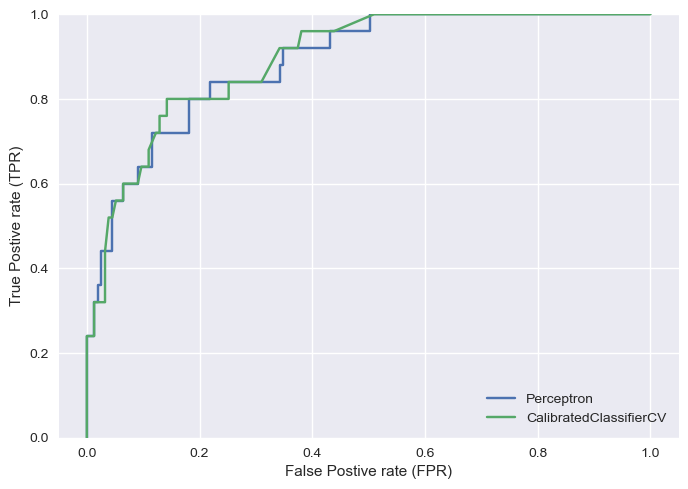

In [16]:
# Perceptron
fpr, tpr, thr = sklearn.metrics.roc_curve(y_test, decision_function)
plt.plot(fpr, tpr, label='Perceptron');

# CCCV
fpr, tpr, thr = sklearn.metrics.roc_curve(y_test, predict_proba[:,1])
plt.plot(fpr, tpr, label='CalibratedClassifierCV');

plt.ylim([0, 1]);
plt.legend(loc='lower right')
plt.xlabel("False Postive rate (FPR)");
plt.ylabel("True Postive rate (TPR)");

In [17]:
print("AUC on TEST for Perceptron: %.3f" % sklearn.metrics.roc_auc_score(y_test, decision_function))
print("AUC on TEST for probabilistic model: %.3f" % sklearn.metrics.roc_auc_score(y_test, predict_proba[:,1]))

AUC on TEST for Perceptron: 0.887
AUC on TEST for probabilistic model: 0.894


#### (b) Discuss the results above

**Answer**: The probabilistic model performs slightly better than the base Perceptron model as it has a higher AUC score than the latter. However, the base Perceptron model reaches a higher TPR faster in the ROC curve, while the probabilistic model eventually reaches a TPR of 1 significantly earlier than the probabilistic model, with a FPR of ~0.4 against ~0.5 for the base Perceptron model. 

#### (c) Compute model metrics for different probabilistic thresholds

Complete `calc_perf_metrics_for_threshold` that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true positive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [18]:
from hw3 import find_best_thresholds

best_TPR, best_PPV_for_best_TPR, best_TPR_threshold, \
best_PPV, best_TPR_for_best_PPV, best_PPV_threshold = find_best_thresholds(y_test, predict_proba[:,1])

In [19]:
print("Best TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("Best PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

Best TPR threshold: 0.0400 => TPR: 1.0000; PPV: 0.2294
Best PPV threshold: 0.6406 => PPV: 1.0000; TPR: 0.2400


#### (e) Exploring different thresholds

#### (i) Using default 0.5 threshold.

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [20]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")

print(calc_confusion_matrix_for_threshold(y_test, predict_proba[:,1], best_thr))
print("")

print_perf_metrics_for_threshold(y_test, predict_proba[:,1], best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Predicted    0   1
True              
0          150   5
1           15  10

0.889 ACC
0.400 TPR
0.968 TNR
0.667 PPV
0.909 NPV


#### (ii) Using threshold with highest TPR.

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [21]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")

print(calc_confusion_matrix_for_threshold(y_test, predict_proba[:,1], best_thr))
print("")

print_perf_metrics_for_threshold(y_test, predict_proba[:,1], best_thr)

ON THE TEST SET:
Chosen best threshold = 0.0400

Predicted   0   1
True             
0          71  84
1           0  25

0.533 ACC
1.000 TPR
0.458 TNR
0.229 PPV
1.000 NPV


#### (iii) Using threshold with highest PPV.

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [22]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
print(calc_confusion_matrix_for_threshold(y_test, predict_proba[:,1], best_thr))
print("")

print_perf_metrics_for_threshold(y_test, predict_proba[:,1], best_thr)

ON THE TEST SET:
Chosen best threshold = 0.6406

Predicted    0  1
True             
0          155  0
1           19  6

0.894 ACC
0.240 TPR
1.000 TNR
1.000 PPV
0.891 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: 

For the default threshold of 0.5, the classifier overdiagnoses some patients without cancer as having cancer, but misses the diagnoses of 60% of patients with cancer, even if two-thirds of patients diagnosed with cancer actually have it. This suggests that the classifier is not very effective at identifying patients with cancer.

For the threshold that maximizes TPR, the classifier is much more effective at identifying patients with cancer, with all patients with cancer being correctly identified as such. However, the classifier does frequently overdiagnose, with only about 27% of patients diagnosed with cancer actually having cancer. This can place added burden on the medical system as the patients have to be scanned again to confirm their diagnosis.

For the threshold that maximizes PPV, the classifier is much more effective at identifying patients without cancer, as it correctly diagnoses all patients without cancer as such. However, it misses the diagnoses of 80% of patients with cancer, as it only identifies 5 out of 25 patients with cancer as such. This can be a significant problem, as it means that the classifier is not very effective at identifying patients with cancer.
